## Importing libaries and getting DataFrame

In [16]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [47]:
import glob
x=glob.glob("../data/*.root")
p=[xs[8:] for xs in x]
p

['data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root',
 'data15_13TeV.00267358.physics_MinBias.30062015_v0_per_1.root',
 'mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root',
 'mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_1.root']

In [21]:
path = "../data/"+p[2]

In [22]:
file = uproot.open(path)
T = file['tree']
df = T.pandas.df("v0_rxy v0_chi2 cosTheta v0_ks_mass trueKs".split(" "))

## Making plots to look at the data

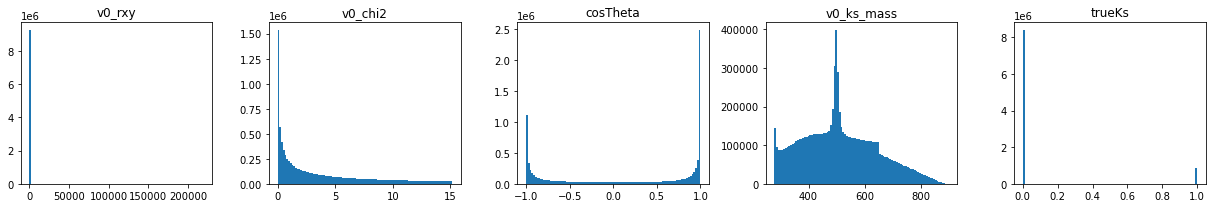

In [23]:
fig, ax = plt.subplots(ncols = 5, figsize = (17, 3))
bins = 100

# fig.suptitle("Hist of all data")

for i, col in enumerate(df.columns):
    ax[i].set_title(col)
    ax[i].hist(df[col], bins = bins)

fig.tight_layout()

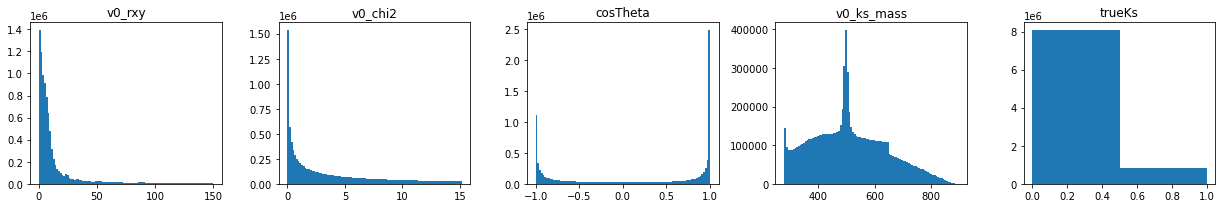

In [24]:
# Restrict v0_rxy to less than 150
cut_rxy = 150
df = df.loc[df["v0_rxy"] < cut_rxy]
ax[0].clear()
ax[0].set_title("v0_rxy")
ax[0].hist(df["v0_rxy"], bins = bins)


# Set bins of TrueKs to two
ax[4].clear()
ax[4].set_title("trueKs")
ax[4].hist(df["trueKs"], bins = 2)

#Draw plot
fig

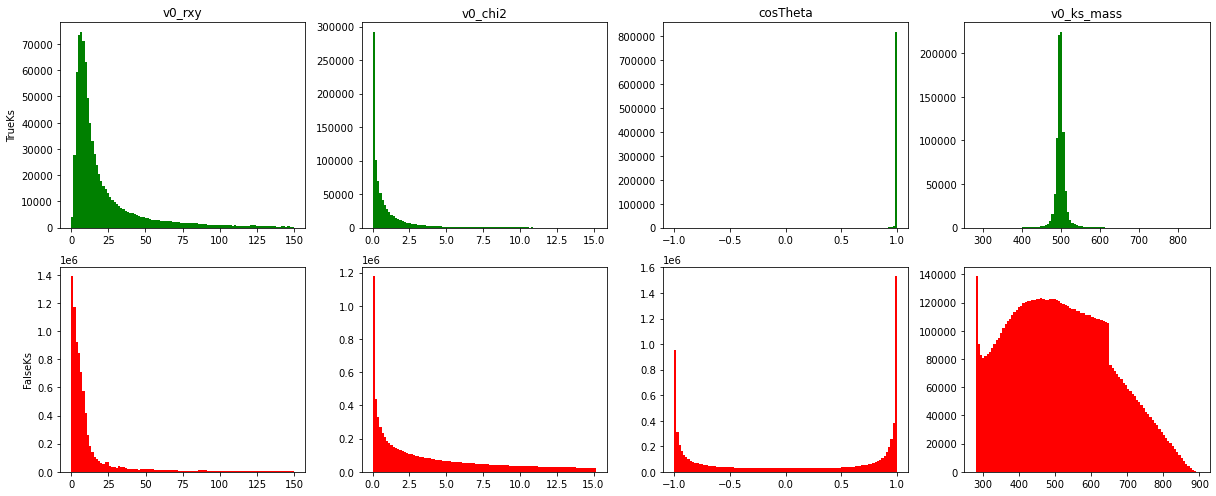

In [25]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueKs], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueKs")
ax[1][0].set_ylabel("FalseKs")

fig.tight_layout()

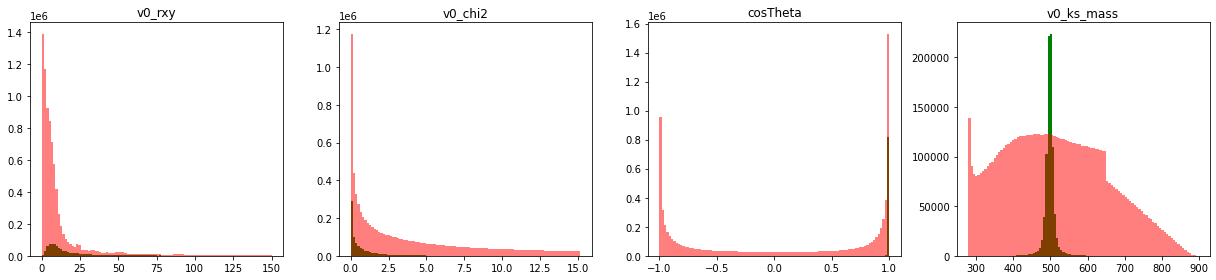

In [26]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (17, 4))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[i].set_title(col)
    ax[i].hist(df[col].loc[trueKs], bins = bins, color = "green", alpha = 1)
    ax[i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red", alpha = 0.5)
    
fig.tight_layout()

## Making cuts
First check the amount of trueKs, so we can see how much signal and background we're cutting

In [27]:
total_signal, total_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {total_signal} \nand the amount of background events is: {total_background}")

print("Signal is {:.2f} %".format(total_signal/(total_background + total_signal) * 100))

The total amount of signal events is:   831849 
and the amount of background events is: 8076293
Signal is 9.34 %


We now make cuts for each variable

### v0_rxy
It is clear that we need to restrict to low values. Lets take a look at v0_rxy for < 150

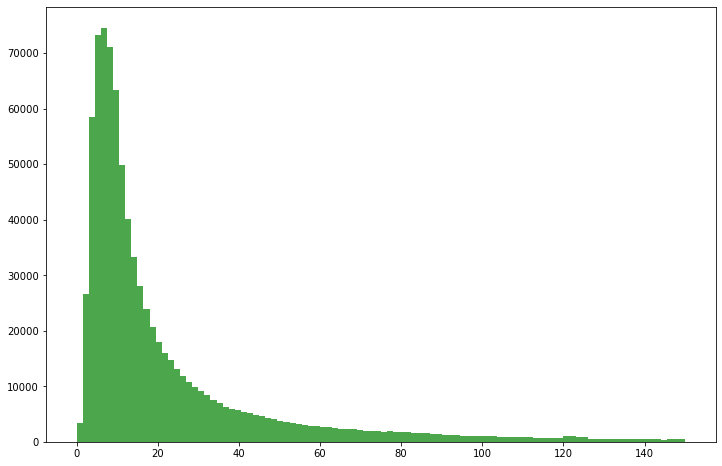

In [28]:
fig, ax = plt.subplots(figsize = (12, 8))
# ax.hist(df['v0_rxy'].loc[df['trueKs'] == 0], bins = 100, range = (0, 100), color = "red");
ax.hist(df['v0_rxy'].loc[df['trueKs'] == 1], bins = 100, range = (0, 150), color = "green", alpha = 0.7);

We choose to cut between 1 and 120

In [29]:
df = df.loc[np.logical_and(df['v0_rxy'] < 130, df['v0_rxy'] > 2)]

In [30]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   816904 
and the amount of background events is: 6209316
Signal is 11.63 %
Signal removed: 14945 
Background removed: 1866977


### Chi2

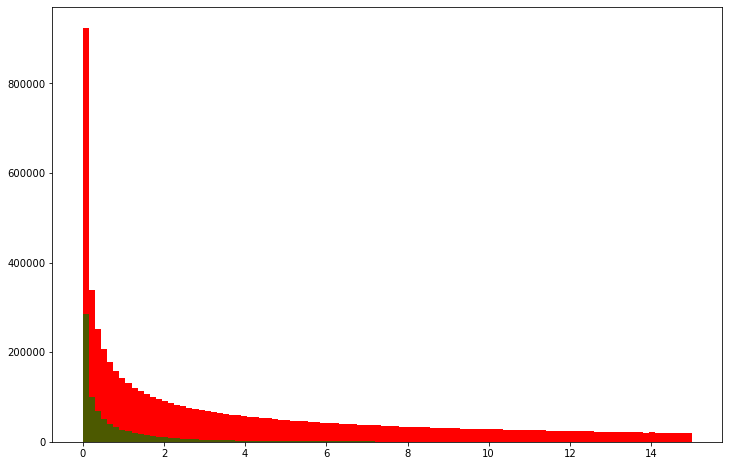

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_chi2'].loc[df['trueKs'] == 0], bins = 100, range = (0, 15), color = "red");
ax.hist(df['v0_chi2'].loc[df['trueKs'] == 1], bins = 100, range = (0, 15), color = "green", alpha = 0.7);

In [32]:
(df['v0_chi2'].loc[df['trueKs'] == 1] > 3.5).sum()

53261

We cut at 3.5 and up

In [33]:
df = df.loc[df['v0_chi2'] < 3.5]

In [34]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   763643 
and the amount of background events is: 3645815
Signal is 17.32 %
Signal removed: 68206 
Background removed: 4430478


### CosTheta

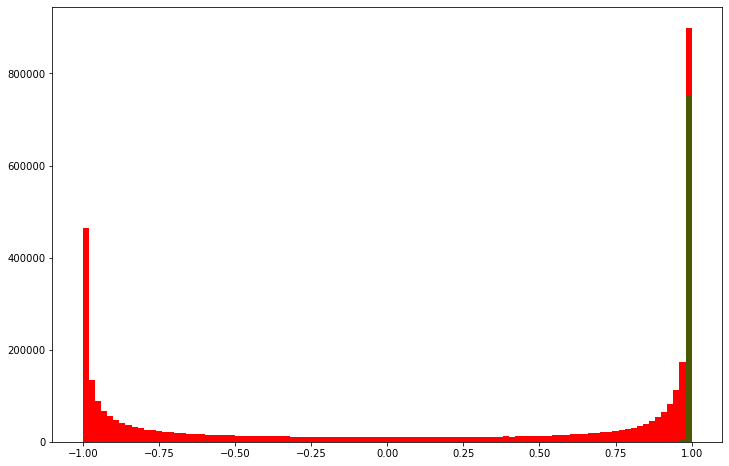

In [35]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['cosTheta'].loc[df['trueKs'] == 0], bins = 100, range = (-1, 1), color = "red");
ax.hist(df['cosTheta'].loc[df['trueKs'] == 1], bins = 100, range = (-1, 1), color = "green", alpha = 0.7);

In [36]:
(df['cosTheta'].loc[df['trueKs'] == 0] < 0.9995).sum()

3242638

Set cut at 0.999

In [37]:
df = df.loc[df['cosTheta'] > 0.9995]

In [38]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   621134 
and the amount of background events is: 403172
Signal is 60.64 %
Signal removed: 210715 
Background removed: 7673121


### K-short mass

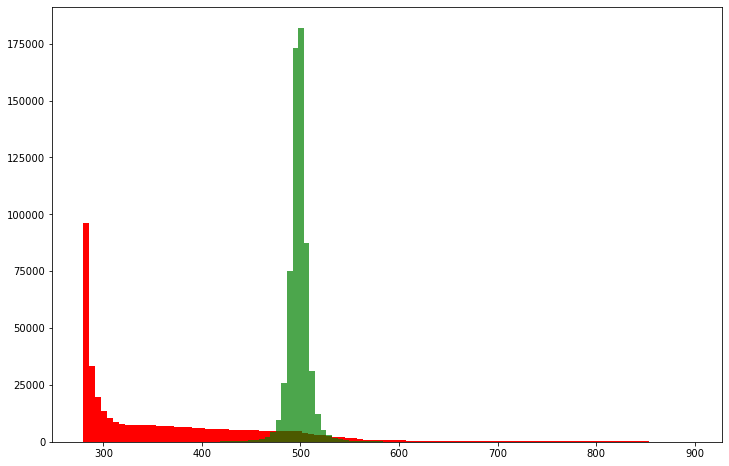

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_ks_mass'].loc[df['trueKs'] == 0], bins = 100, color = "red");
ax.hist(df['v0_ks_mass'].loc[df['trueKs'] == 1], bins = 100, color = "green", alpha = 0.7);

In [40]:
df['v0_ks_mass'].loc[df['trueKs'] == 1].describe()

count    621134.000000
mean        498.370209
std          11.668837
min         280.855591
25%         493.446869
50%         498.166168
75%         503.001091
max         851.574158
Name: v0_ks_mass, dtype: float64

In [41]:
std=np.std(df['v0_ks_mass'].loc[df['trueKs']==1])

Check if we make a 4 sigma cut, so 498.68 +/- 5.18

In [42]:
(abs(df['v0_ks_mass'].loc[df['trueKs'] == 1] - 498.68) > 4 * std).sum()

5267

In [43]:
df = df.loc[abs(df['v0_ks_mass'] - 498.68) < 4 * std]

In [44]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   615867 
and the amount of background events is: 58757
Signal is 91.29 %
Signal removed: 215982 
Background removed: 8017536


## Try plot after cuts

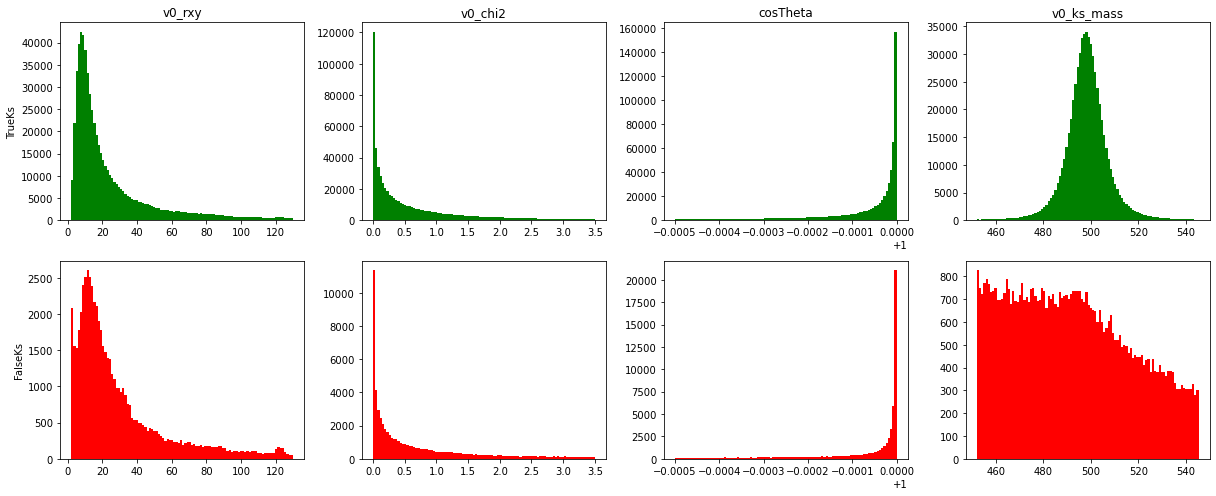

In [45]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueKs], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueKs")
ax[1][0].set_ylabel("FalseKs")

fig.tight_layout()

In [48]:
path = "../data/"+p[0]

In [50]:
file = uproot.open(path)
T = file['tree']
df = T.pandas.df("v0_rxy v0_chi2 cosTheta v0_ks_mass ".split(" "))

In [53]:
names_mc=['eventCounter', 'npv', 'ntrk_pv0', 'pv0_x', 'pv0_y', 'pv0_z', 'a0xy', 'a0', 'a0z', 'cosTheta', 'v0_chi2', 'v0_x', 'v0_y', 'v0_z', 'v0_rxy', 'v0_rxyErr', 'v0_px', 'v0_py', 'v0_pz', 'v0_pt', 'v0_p', 'v0_ptErr', 'v0_ks_mass', 'v0_la_mass', 'v0_lb_mass', 'v0_ks_massErr', 'v0_la_massErr', 'v0_lb_massErr', 'v0_px1', 'v0_py1', 'v0_pz1', 'v0_pt1', 'v0_p1', 'v0_px2', 'v0_py2', 'v0_pz2', 'v0_pt2', 'v0_p2', 'v0_phi1', 'v0_theta1', 'v0_qOverP1', 'v0_phi2', 'v0_theta2', 'v0_qOverP2', 'alpha', 'calpha', 'epsilon1', 'epsilon2', 'Alpha', 'pL1', 'pL2', 'pT', 'thetastar', 'rapidity_ks', 'rapidity_la', 'rapidity_lb', 'pseudorapidity', 'numberOfPixelHits1', 'numberOfSCTHits1', 'numberOfTRTHits1', 'numberOfTRTHighThresholdHits1', 'numberOfBLayerHits1', 'expectBLayerHit1', 'numberOfInnermostPixelLayerHits1', 'expectInnermostPixelLayerHit1', 'numberOfPixelHits2', 'numberOfSCTHits2', 'numberOfTRTHits2', 'numberOfTRTHighThresholdHits2', 'numberOfBLayerHits2', 'expectBLayerHit2', 'numberOfInnermostPixelLayerHits2', 'expectInnermostPixelLayerHit2', 'numberOfContribPixelLayers1', 'numberOfBLayerOutliers1', 'numberOfBLayerSharedHits1', 'numberOfBLayerSplitHits1', 'numberOfInnermostPixelLayerOutliers1', 'numberOfInnermostPixelLayerSharedHits1', 'numberOfInnermostPixelLayerSplitHits1', 'expectNextToInnermostPixelLayerHit1', 'numberOfNextToInnermostPixelLayerHits1', 'numberOfNextToInnermostPixelLayerOutliers1', 'numberOfNextToInnermostPixelLayerSharedHits1', 'numberOfNextToInnermostPixelLayerSplitHits1', 'numberOfPixelOutliers1', 'numberOfPixelHoles1', 'numberOfPixelSharedHits1', 'numberOfPixelSplitHits1', 'numberOfGangedPixels1', 'numberOfGangedFlaggedFakes1', 'numberOfPixelDeadSensors1', 'numberOfPixelSpoiltHits1', 'numberOfSCTOutliers1', 'numberOfSCTHoles1', 'numberOfSCTDoubleHoles1', 'numberOfSCTSharedHits1', 'numberOfSCTDeadSensors1', 'numberOfSCTSpoiltHits1', 'numberOfTRTOutliers1', 'numberOfTRTHoles1', 'numberOfTRTHighThresholdOutliers1', 'numberOfTRTDeadStraws1', 'numberOfTRTTubeHits1', 'numberOfTRTXenonHits1', 'numberOfTRTSharedHits1', 'numberOfContribPixelLayers2', 'numberOfBLayerOutliers2', 'numberOfBLayerSharedHits2', 'numberOfBLayerSplitHits2', 'numberOfInnermostPixelLayerOutliers2', 'numberOfInnermostPixelLayerSharedHits2', 'numberOfInnermostPixelLayerSplitHits2', 'expectNextToInnermostPixelLayerHit2', 'numberOfNextToInnermostPixelLayerHits2', 'numberOfNextToInnermostPixelLayerOutliers2', 'numberOfNextToInnermostPixelLayerSharedHits2', 'numberOfNextToInnermostPixelLayerSplitHits2', 'numberOfPixelOutliers2', 'numberOfPixelHoles2', 'numberOfPixelSharedHits2', 'numberOfPixelSplitHits2', 'numberOfGangedPixels2', 'numberOfGangedFlaggedFakes2', 'numberOfPixelDeadSensors2', 'numberOfPixelSpoiltHits2', 'numberOfSCTOutliers2', 'numberOfSCTHoles2', 'numberOfSCTDoubleHoles2', 'numberOfSCTSharedHits2', 'numberOfSCTDeadSensors2', 'numberOfSCTSpoiltHits2', 'numberOfTRTOutliers2', 'numberOfTRTHoles2', 'numberOfTRTHighThresholdOutliers2', 'numberOfTRTDeadStraws2', 'numberOfTRTTubeHits2', 'numberOfTRTXenonHits2', 'numberOfTRTSharedHits2', 'trueKs', 'trueLa', 'trueLb', 'trueGa', 'trueKs_x', 'trueKs_y', 'trueKs_z', 'trueLa_x', 'trueLa_y', 'trueLa_z', 'trueLb_x', 'trueLb_y', 'trueLb_z', 'trueGa_x', 'trueGa_y', 'trueGa_z']
names_mc

['eventCounter',
 'npv',
 'ntrk_pv0',
 'pv0_x',
 'pv0_y',
 'pv0_z',
 'a0xy',
 'a0',
 'a0z',
 'cosTheta',
 'v0_chi2',
 'v0_x',
 'v0_y',
 'v0_z',
 'v0_rxy',
 'v0_rxyErr',
 'v0_px',
 'v0_py',
 'v0_pz',
 'v0_pt',
 'v0_p',
 'v0_ptErr',
 'v0_ks_mass',
 'v0_la_mass',
 'v0_lb_mass',
 'v0_ks_massErr',
 'v0_la_massErr',
 'v0_lb_massErr',
 'v0_px1',
 'v0_py1',
 'v0_pz1',
 'v0_pt1',
 'v0_p1',
 'v0_px2',
 'v0_py2',
 'v0_pz2',
 'v0_pt2',
 'v0_p2',
 'v0_phi1',
 'v0_theta1',
 'v0_qOverP1',
 'v0_phi2',
 'v0_theta2',
 'v0_qOverP2',
 'alpha',
 'calpha',
 'epsilon1',
 'epsilon2',
 'Alpha',
 'pL1',
 'pL2',
 'pT',
 'thetastar',
 'rapidity_ks',
 'rapidity_la',
 'rapidity_lb',
 'pseudorapidity',
 'numberOfPixelHits1',
 'numberOfSCTHits1',
 'numberOfTRTHits1',
 'numberOfTRTHighThresholdHits1',
 'numberOfBLayerHits1',
 'expectBLayerHit1',
 'numberOfInnermostPixelLayerHits1',
 'expectInnermostPixelLayerHit1',
 'numberOfPixelHits2',
 'numberOfSCTHits2',
 'numberOfTRTHits2',
 'numberOfTRTHighThresholdHits2',
 'num

In [55]:
names_data=[]
for name in names_mc:
    if 'true' not in name:
        names_data.append(name)
names_data

['eventCounter',
 'npv',
 'ntrk_pv0',
 'pv0_x',
 'pv0_y',
 'pv0_z',
 'a0xy',
 'a0',
 'a0z',
 'cosTheta',
 'v0_chi2',
 'v0_x',
 'v0_y',
 'v0_z',
 'v0_rxy',
 'v0_rxyErr',
 'v0_px',
 'v0_py',
 'v0_pz',
 'v0_pt',
 'v0_p',
 'v0_ptErr',
 'v0_ks_mass',
 'v0_la_mass',
 'v0_lb_mass',
 'v0_ks_massErr',
 'v0_la_massErr',
 'v0_lb_massErr',
 'v0_px1',
 'v0_py1',
 'v0_pz1',
 'v0_pt1',
 'v0_p1',
 'v0_px2',
 'v0_py2',
 'v0_pz2',
 'v0_pt2',
 'v0_p2',
 'v0_phi1',
 'v0_theta1',
 'v0_qOverP1',
 'v0_phi2',
 'v0_theta2',
 'v0_qOverP2',
 'alpha',
 'calpha',
 'epsilon1',
 'epsilon2',
 'Alpha',
 'pL1',
 'pL2',
 'pT',
 'thetastar',
 'rapidity_ks',
 'rapidity_la',
 'rapidity_lb',
 'pseudorapidity',
 'numberOfPixelHits1',
 'numberOfSCTHits1',
 'numberOfTRTHits1',
 'numberOfTRTHighThresholdHits1',
 'numberOfBLayerHits1',
 'expectBLayerHit1',
 'numberOfInnermostPixelLayerHits1',
 'expectInnermostPixelLayerHit1',
 'numberOfPixelHits2',
 'numberOfSCTHits2',
 'numberOfTRTHits2',
 'numberOfTRTHighThresholdHits2',
 'num